In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import math
import time

In [2]:
# Lê o arquivo CSV (ou Excel, se for o caso)
df = pd.read_excel('dadosEx2.xlsx').set_index('id')  # Se for CSV
# df = pd.read_excel('dados.xlsx')  # Se for Excel

# Mostra as primeiras linhas para verificar
print(df.head())

     x   y  demanda
id                 
0   42   6        0
1   28  23        8
2   33   5       15
3   45  13        9
4   14   3        6


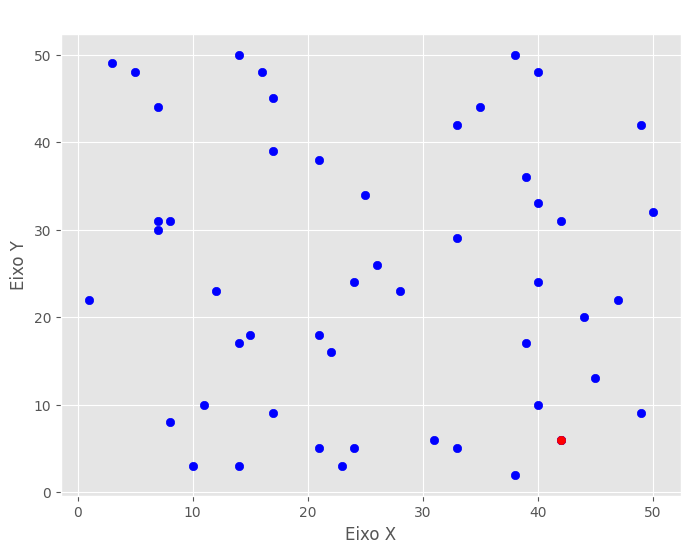

In [3]:
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
plt.scatter(df['x'], df['y'], color='blue')
plt.scatter(df['x'].iloc[0], df['y'].iloc[0], color='red')

# Configurações do gráfico
plt.title('Gráfico de Pontos (x, y)')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)  # Adiciona grade
#plt.legend()  # Mostra legenda

# Mostra o gráfico
plt.show()


Melhor distância total: 935.44
Tempo total: 2.82 segundos

Detalhes das rotas finais (capacidade do veículo = {capacidade_veiculo}):

Rota 1:
  • Pontos atendidos: [8, 22, 44, 45, 47]
  • Demanda total: 51/60
  • Distância: 91.49
  • Trajeto completo: [0, 8, 22, 44, 45, 47, 0]

Rota 2:
  • Pontos atendidos: [19, 20, 23, 31, 37]
  • Demanda total: 55/60
  • Distância: 93.52
  • Trajeto completo: [0, 19, 20, 23, 31, 37, 0]

Rota 3:
  • Pontos atendidos: [4, 9, 25, 35, 41]
  • Demanda total: 58/60
  • Distância: 78.88
  • Trajeto completo: [0, 4, 9, 25, 35, 41, 0]

Rota 4:
  • Pontos atendidos: [11, 43, 49]
  • Demanda total: 48/60
  • Distância: 61.68
  • Trajeto completo: [0, 11, 43, 49, 0]

Rota 5:
  • Pontos atendidos: [14, 16]
  • Demanda total: 29/60
  • Distância: 11.31
  • Trajeto completo: [0, 14, 16, 0]

Rota 6:
  • Pontos atendidos: [7, 29, 32, 36, 46]
  • Demanda total: 56/60
  • Distância: 101.74
  • Trajeto completo: [0, 7, 29, 32, 36, 46, 0]

Rota 7:
  • Pontos atendidos: 

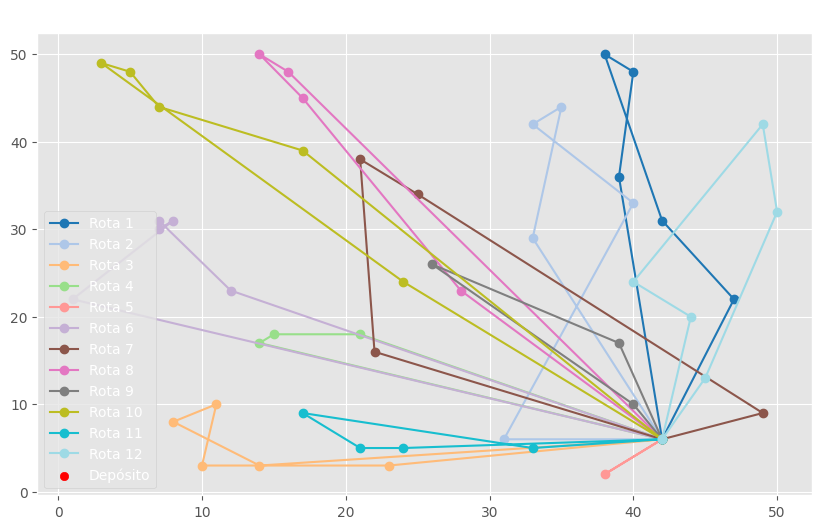

In [ ]:
points = df[['x', 'y']].to_numpy()

def euclidean_distance(p1, p2):
    """Calcula a distância euclidiana entre dois pontos."""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def savings_list(points):
    """Calcula a lista de savings para todos os pares de pontos."""
    gamma = random.random() * 2
    savings = []
    depot = points[0]
    n_points = len(points)

    for i in range(1, n_points):
        for j in range(i+1, n_points):
            save = (euclidean_distance(depot, points[i]) +
                    euclidean_distance(depot, points[j]) - 
                    gamma*euclidean_distance(points[i], points[j]))
            savings.append((save, i, j))
    savings.sort(reverse=True, key=lambda x: x[0])
    return savings

def clarke_wright_parallel(points, demandas, capacidade):
    n_points = len(points)
    routes = [[i] for i in range(1, n_points)]
    route_lookup = {i: route for route in routes for i in route}
    # Dicionário para rastrear demanda total por rota
    route_demand = {tuple(route): sum(demandas[i] for i in route) for route in routes}

    savings = savings_list(points)

    for save, i, j in savings:
        if i in route_lookup and j in route_lookup and route_lookup[i] != route_lookup[j]:
            route_i = route_lookup[i]
            route_j = route_lookup[j]
            # Verifica se a combinação não excede a capacidade
            combined_demand = route_demand[tuple(route_i)] + route_demand[tuple(route_j)]
            if combined_demand <= capacidade:
                if route_i[-1] == i and route_j[0] == j:
                    new_route = route_i + route_j
                    # Atualiza demandas e rotas
                    route_demand[tuple(new_route)] = combined_demand
                    del route_demand[tuple(route_i)], route_demand[tuple(route_j)]
                    for point in new_route:
                        route_lookup[point] = new_route

    # Filtra rotas válidas (com demanda <= capacidade)
    final_routes = [route for route in route_lookup.values() 
                   if route_demand.get(tuple(route), 0) <= capacidade]
    final_routes = set(tuple(route) for route in final_routes)
    
    # Cálculo da distância (como antes)
    total_distance = 0
    for route in final_routes:
        route = [0] + list(route) + [0]
        for k in range(len(route) - 1):
            total_distance += euclidean_distance(points[route[k]], points[route[k + 1]])

    return total_distance, final_routes

# Rodando a heurística de Clarke & Wright 100 vezes
num_iterations = 100
best_distance = np.inf
best_routes = None
capacidade_veiculo = 60  # Exemplo: capacidade máxima por veículo
demandas = df['demanda'].to_numpy()

start_time = time.time()  # Início da medição do tempo

for _ in range(num_iterations):
    #distance, routes = clarke_wright_parallel(points)
    distance, routes = clarke_wright_parallel(points, demandas, capacidade_veiculo)

    if distance < best_distance:
        best_distance = distance
        best_routes = routes

end_time = time.time()  # Fim da medição do tempo
elapsed_time = end_time - start_time

# Imprime a melhor distância e as rotas finais
print(f"\nMelhor distância total: {best_distance:.2f}")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print("\nDetalhes das rotas finais (capacidade do veículo = {capacidade_veiculo}):")

for idx, route in enumerate(best_routes, 1):
    pontos_rota = [0] + list(route) + [0]  # Adiciona depósito no início e fim
    demanda_total = sum(df['demanda'].iloc[list(route)])  # Soma demandas dos pontos
    
    print(f"\nRota {idx}:")
    print(f"  • Pontos atendidos: {list(route)}")
    print(f"  • Demanda total: {demanda_total}/{capacidade_veiculo}")
    print(f"  • Distância: {sum(euclidean_distance(points[pontos_rota[k]],
                                                    points[pontos_rota[k+1]]) for k in range(len(pontos_rota)-1)):.2f}")
    print(f"  • Trajeto completo: {pontos_rota}")

# Plotar a melhor rota
if best_routes is not None:
    plt.figure(figsize=(10, 6))
    colors = plt.get_cmap('tab20', len(best_routes))  # Mapa de cores para as rotas
    for idx, route in enumerate(best_routes):
        route_points = points[[0] + list(route) + [0]]
        plt.plot(route_points[:, 0], route_points[:, 1], 'o-', color=colors(idx), label=f'Rota {idx+1}')
    plt.scatter(points[0, 0], points[0, 1], color='red', label='Depósito')  # Origem
    plt.title("Melhor rota encontrada pela heurística de Clarke & Wright")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Nenhuma rota foi encontrada.")